In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Pengumpulan Data

In [4]:
df = pd.read_csv('/content/boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df_target = df['medv']
df_feature = df.drop(columns='medv')

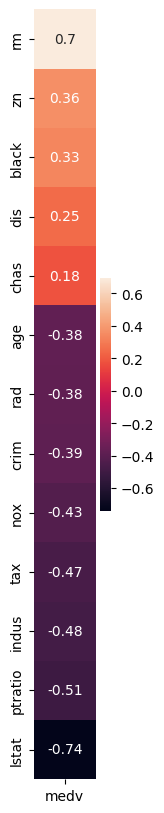

In [6]:
plt.subplots(figsize=(1, 10))
sns.heatmap(df.corr()[['medv']].sort_values(by='medv', ascending=False).iloc[1:,], annot=True)
plt.show()

#Deskripsi Kolom:
* **crim**	Tingkat kriminalitas	Kriminalitas tinggi maka harga rumah turun (korelasi **NEGATIF**)
* **zn**	Proporsi lahan hunian besar	Area eksklusif, harga akan semakin naik (korelasi **POSITIF**)
* **indus**	Proporsi area industri	Industri tinggi maka kualitas lingkungan turun (korelasi **NEGATIF**)
* **chas**	Dekat sungai Charles (0/1)	Lokasi lebih bagus (korelasi **POSITIF**)
* **nox**	Konsentrasi polusi NOx	Polusi tinggi maka harga turun (korelasi **NEGATIF**)
* **rm**	Rata-rata jumlah kamar	Semakin besar rumah maka harga naik (korelasi **POSITIF**)
* **age**	Umur bangunan	semakin tua maka harga turun (korelasi **NEGATIF**)
* **dis**	jarak ke pusat pekerjaan/industri makin tinggi maka makin nyaman sehingga harga makin naik (korelasi **POSITIF**)
* **rad**	indikator kedekatan dengan jalan raya besar & kawasan industri, makin tinggi maka makin tidak nyaman (korelasi **NEGATIF**)
* **tax**	Pajak properti	Pajak tinggi mempengaruhi harga (korelasi **NEGATIF**)
* **ptratio**	Rasio murid-guru	semakin tinggi maka lebih banyak murid daripada guru sehingga kualitas pendidikannya menurun (korelasi **NEGATIF**)
* **black**	Indikator demografis	faktor sosial-ekonomi wilayah, semakin tinggi maka harga semakin naik (korelasi **POSITIF**)
* **lstat**	Persentase penduduk miskin, semakin besar maka harga turun (korelasi **NEGATIF**)
* **medv**	Harga median rumah	**Target**

# 2. Persiapan Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# split train test

feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)
# EDA (using all dataset), feature engineering / data cleaning / data preparation -> missing value, outlier handling, encoding, feature scalling dsb

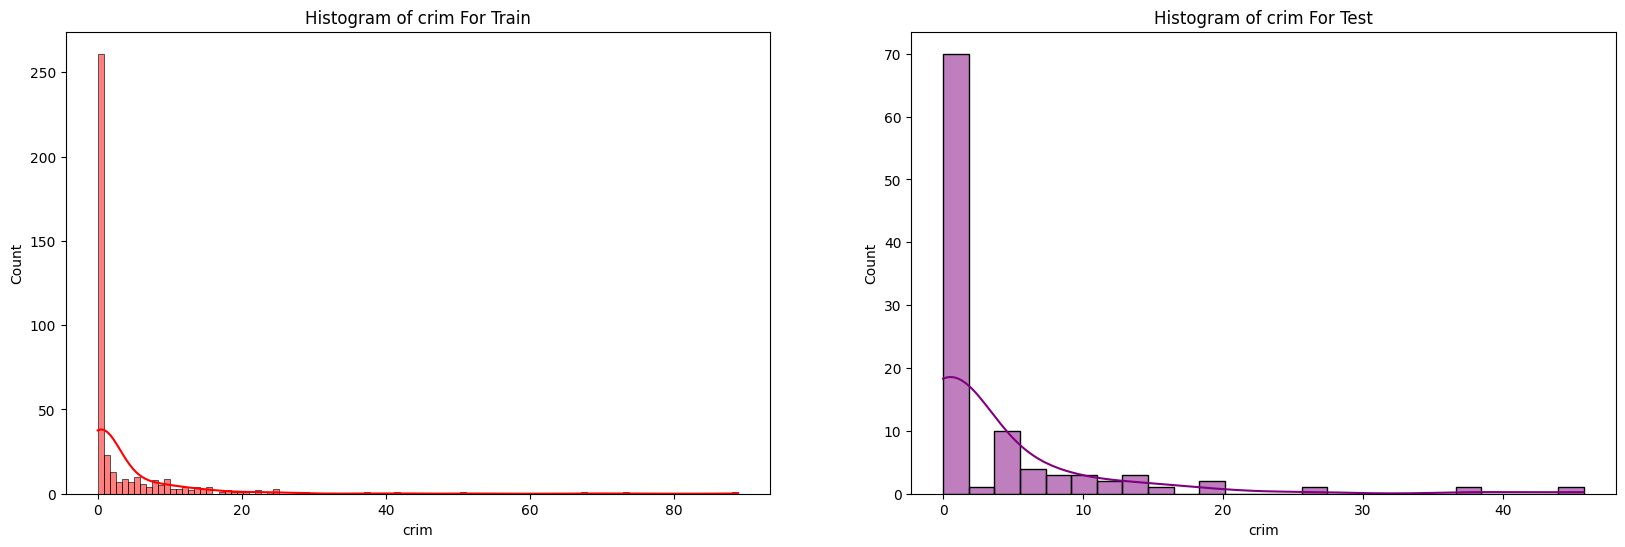

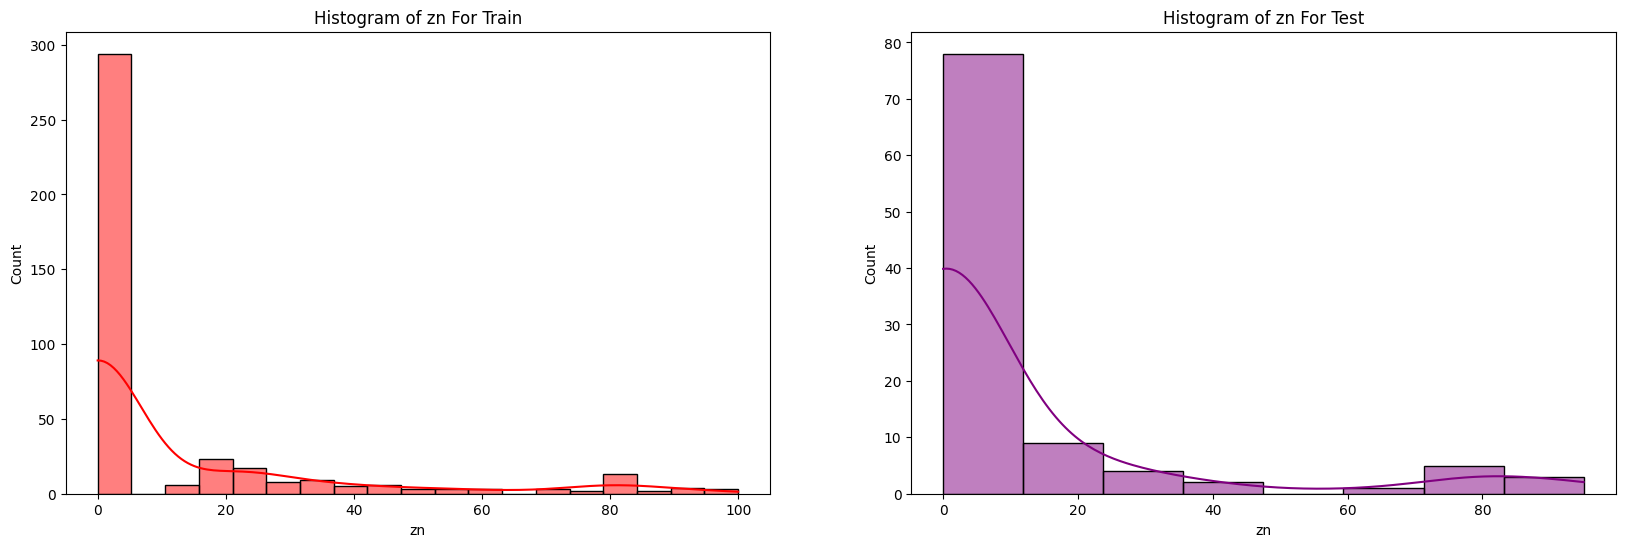

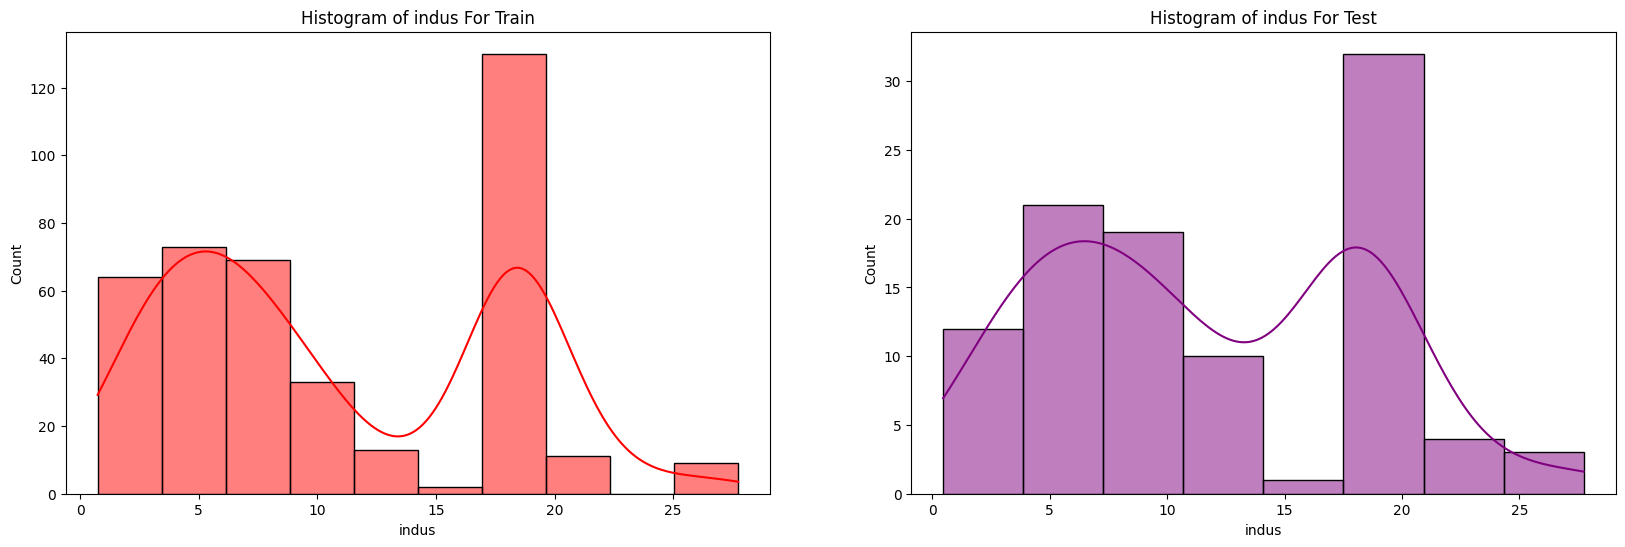

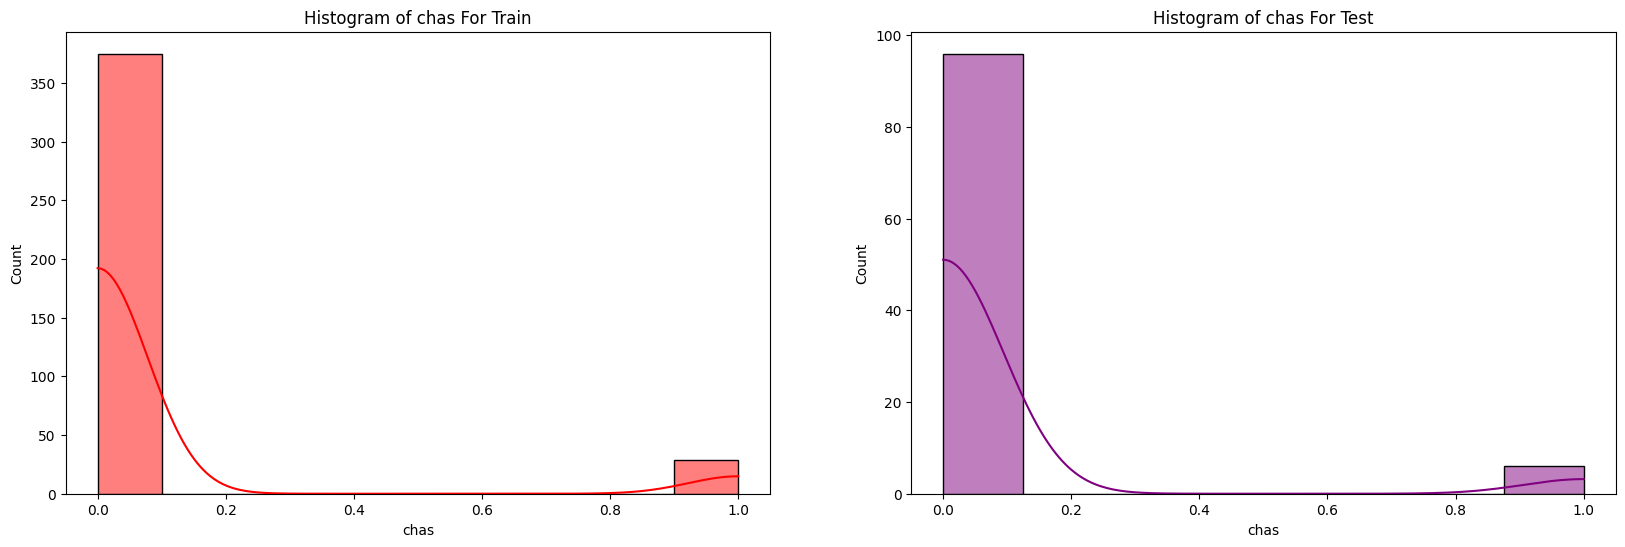

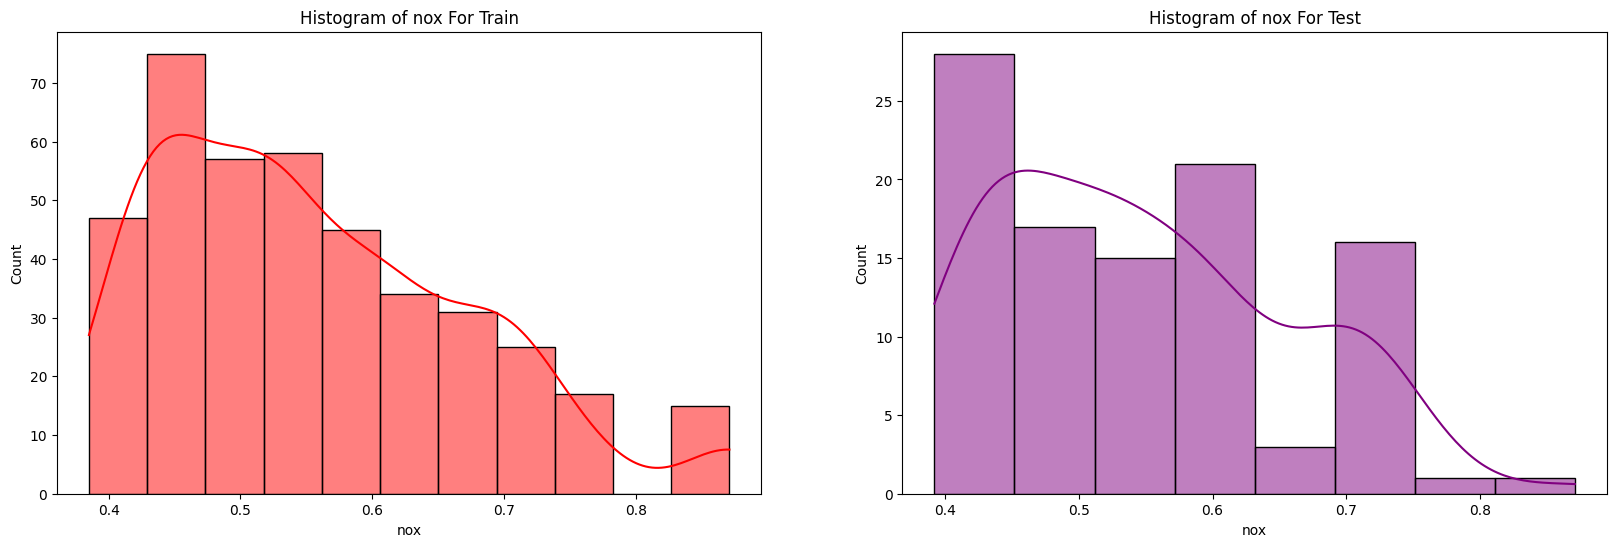

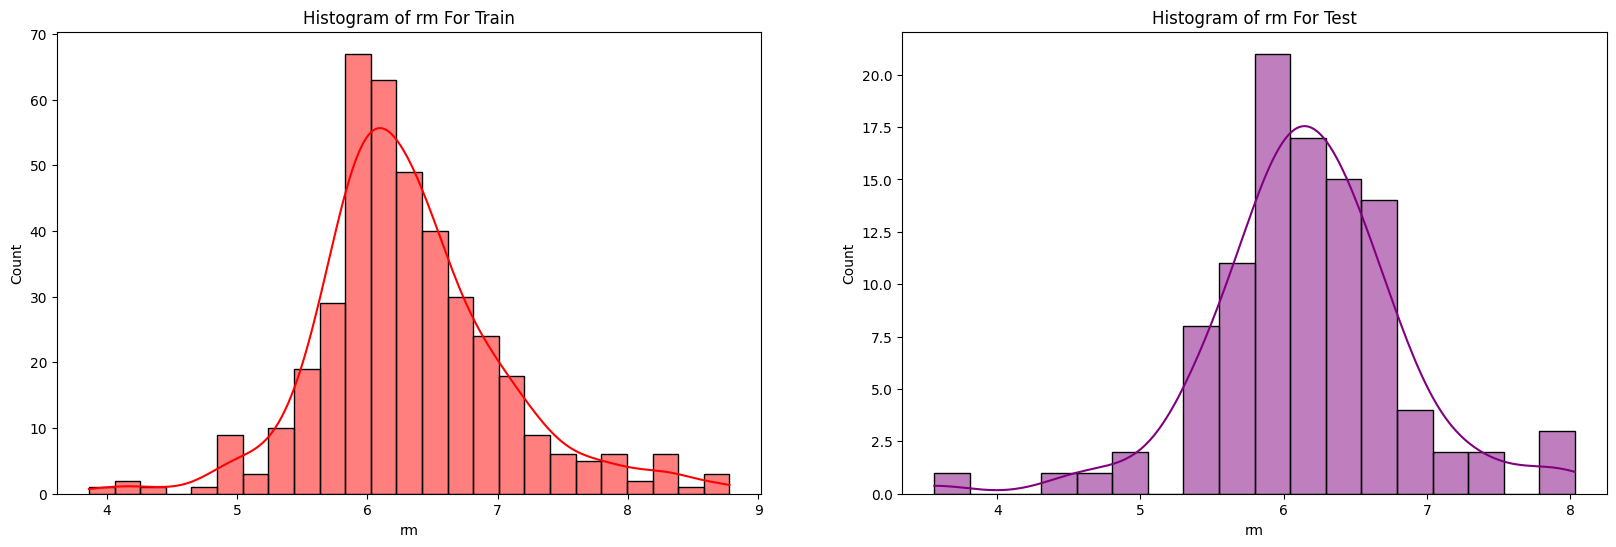

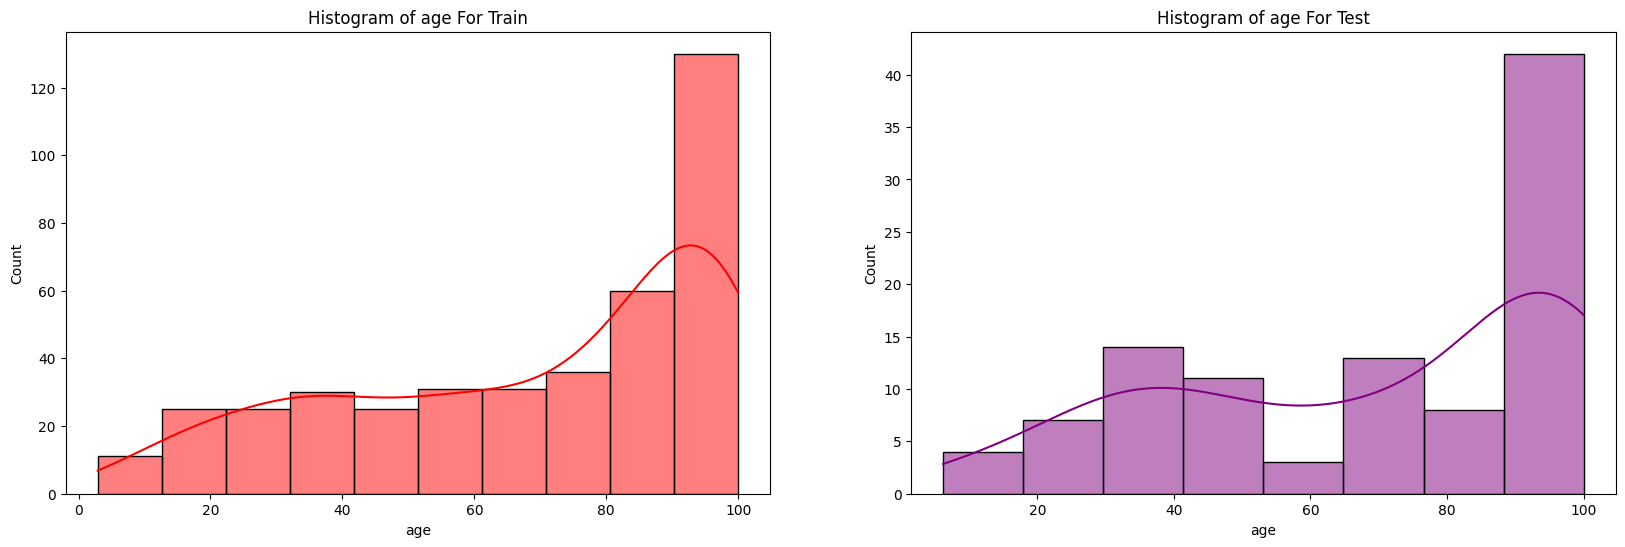

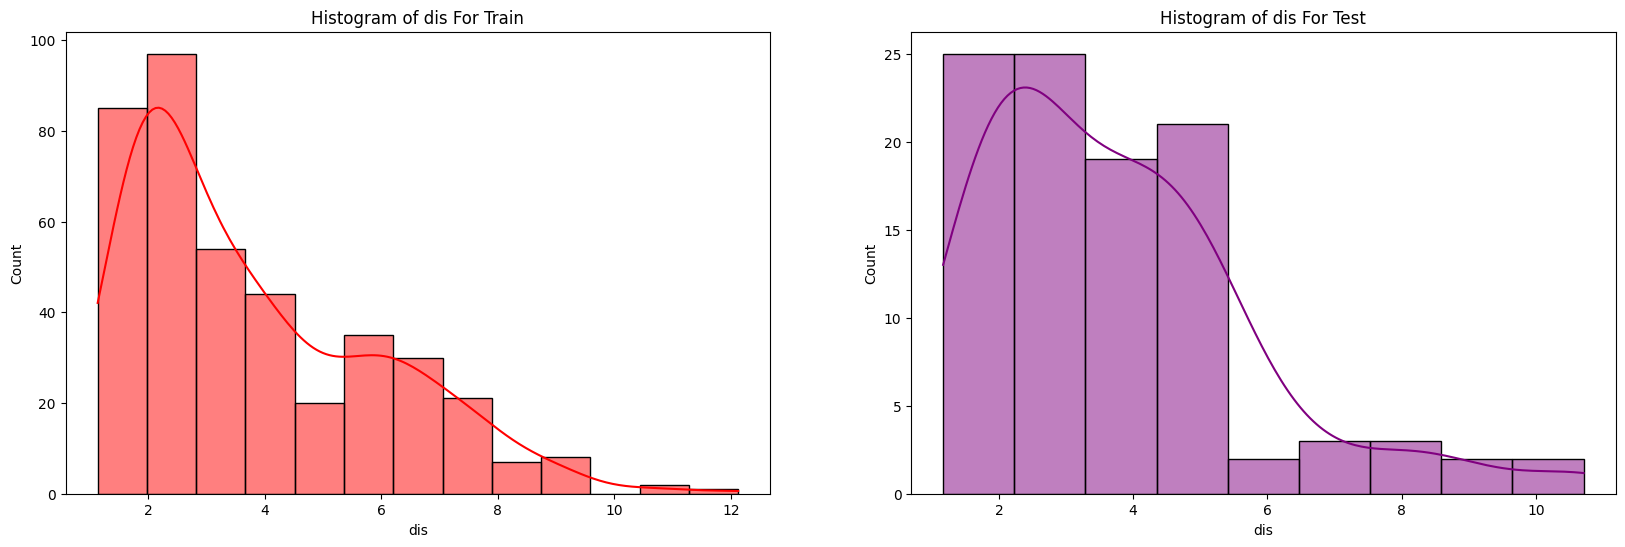

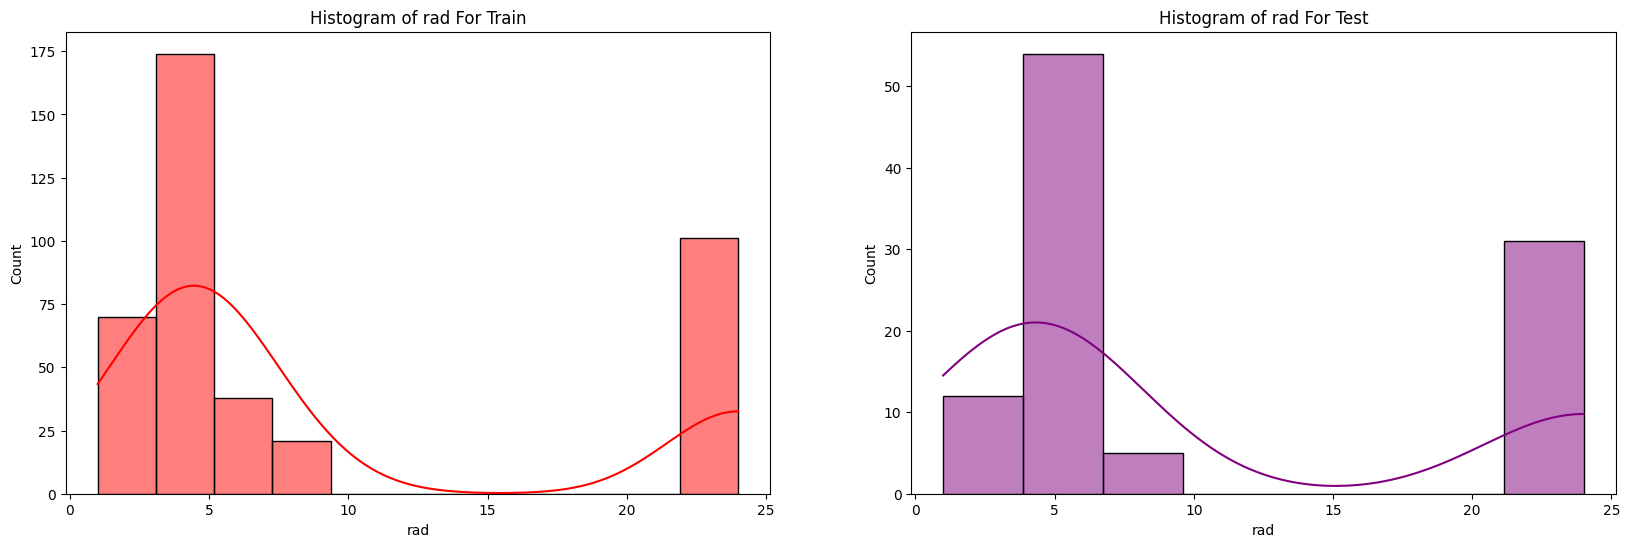

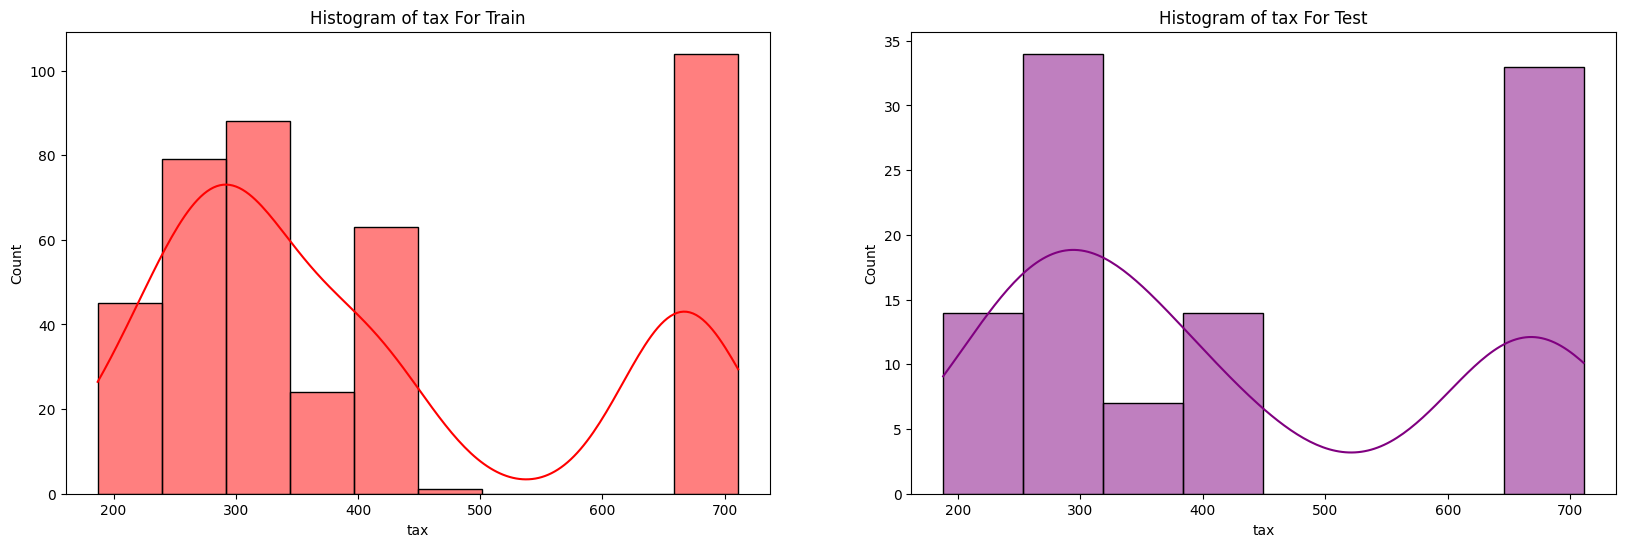

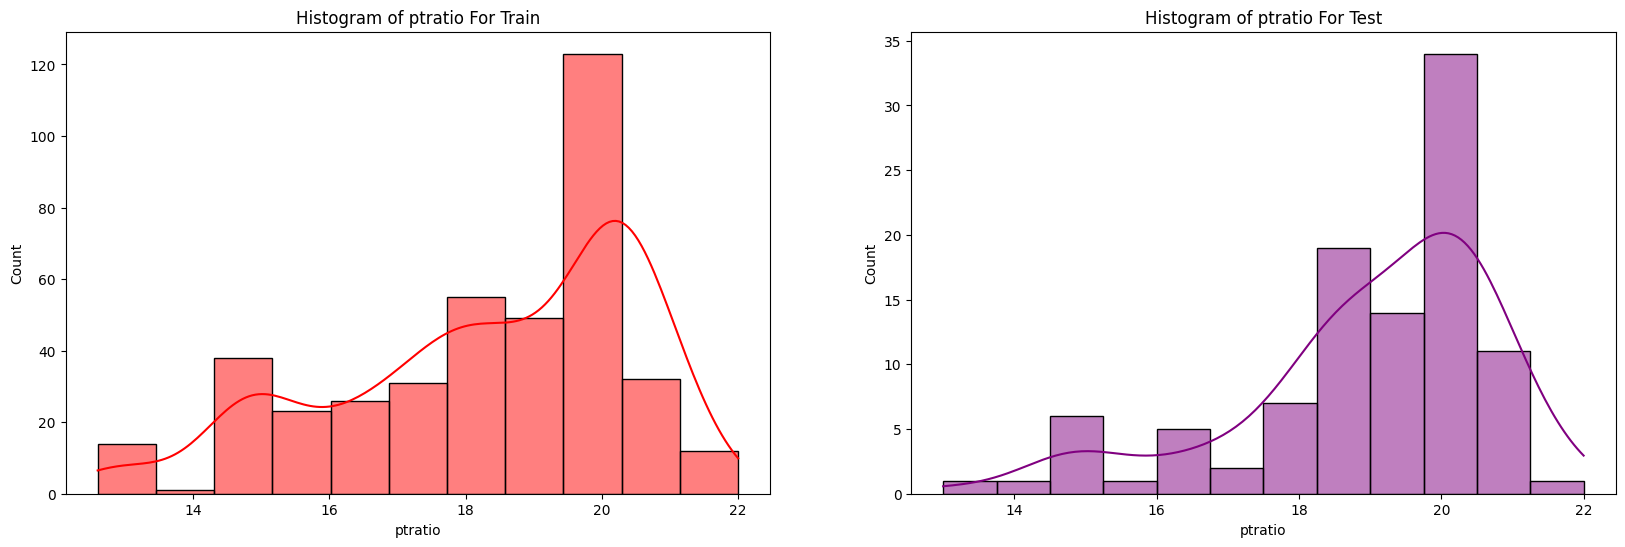

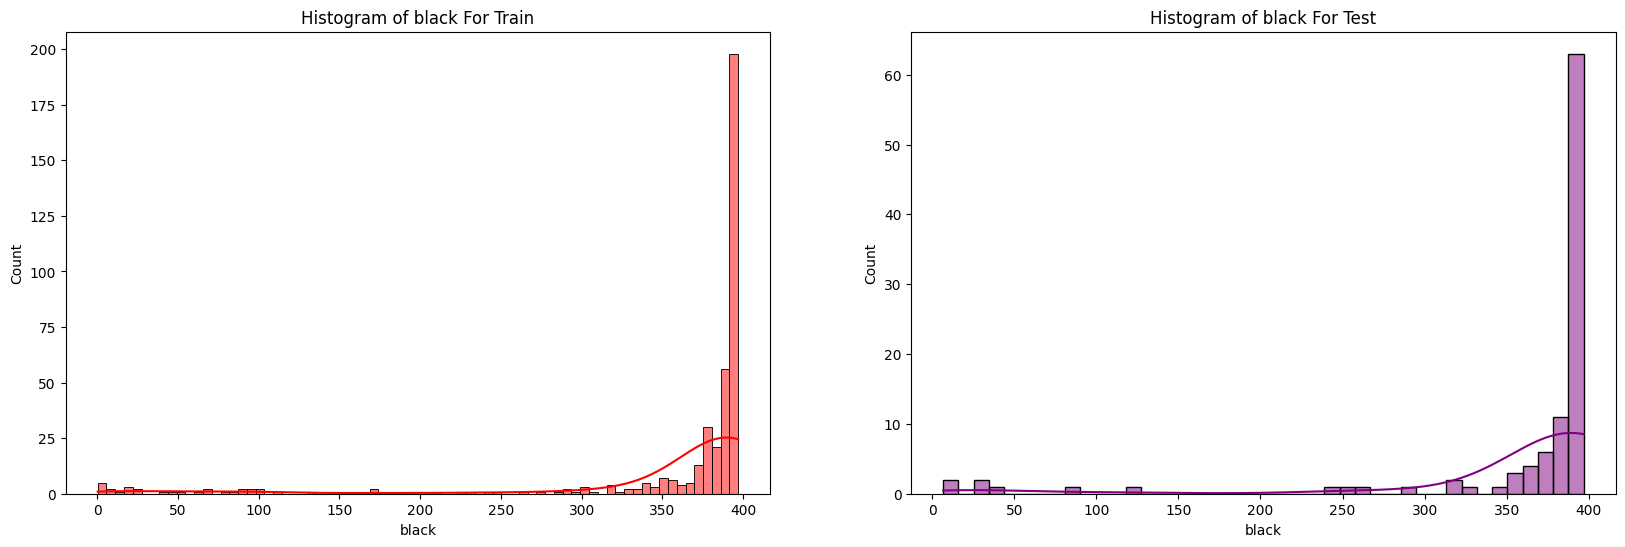

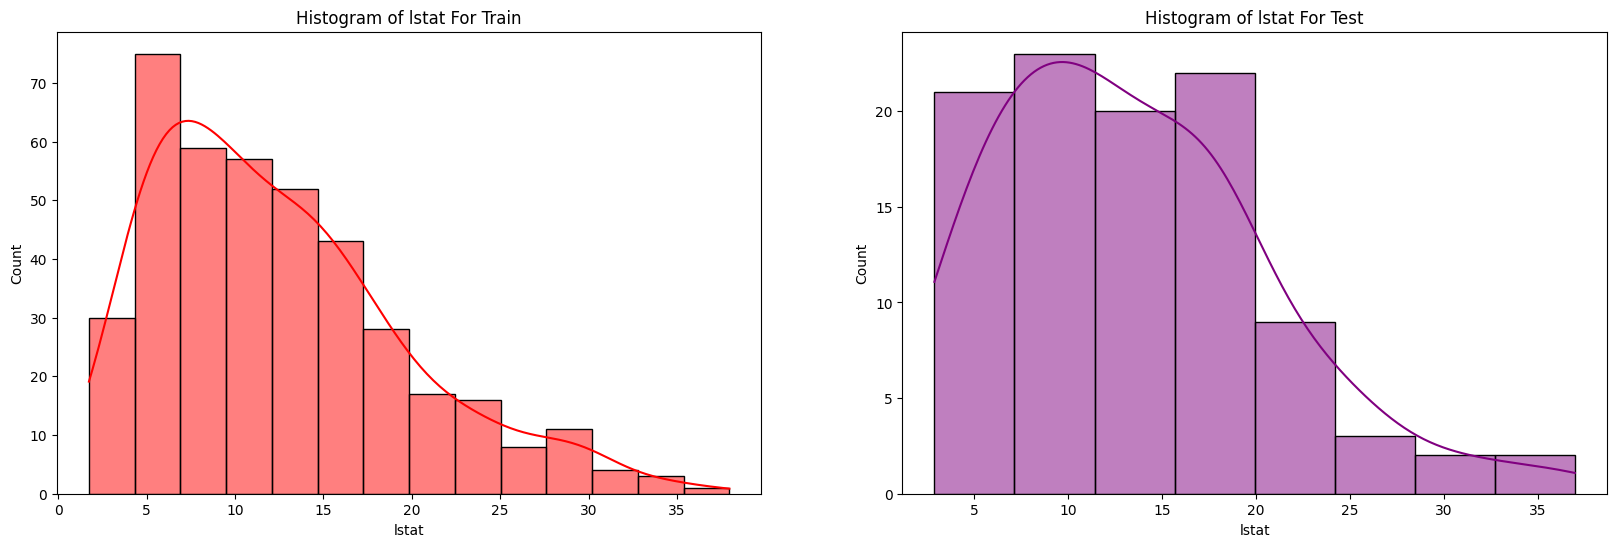

In [11]:
for col in feature_df_train.columns:
  fig, axes = plt.subplots(1, 2, figsize=(20, 6))

  sns.histplot(feature_df_train[col], kde=True, ax=axes[0],color='red')
  axes[0].set_title(f'Histogram of {col} For Train')

  sns.histplot(feature_df_test[col],kde=True, ax=axes[1], color='purple')
  axes[1].set_title(f'Histogram of {col} For Test')


  plt.show()

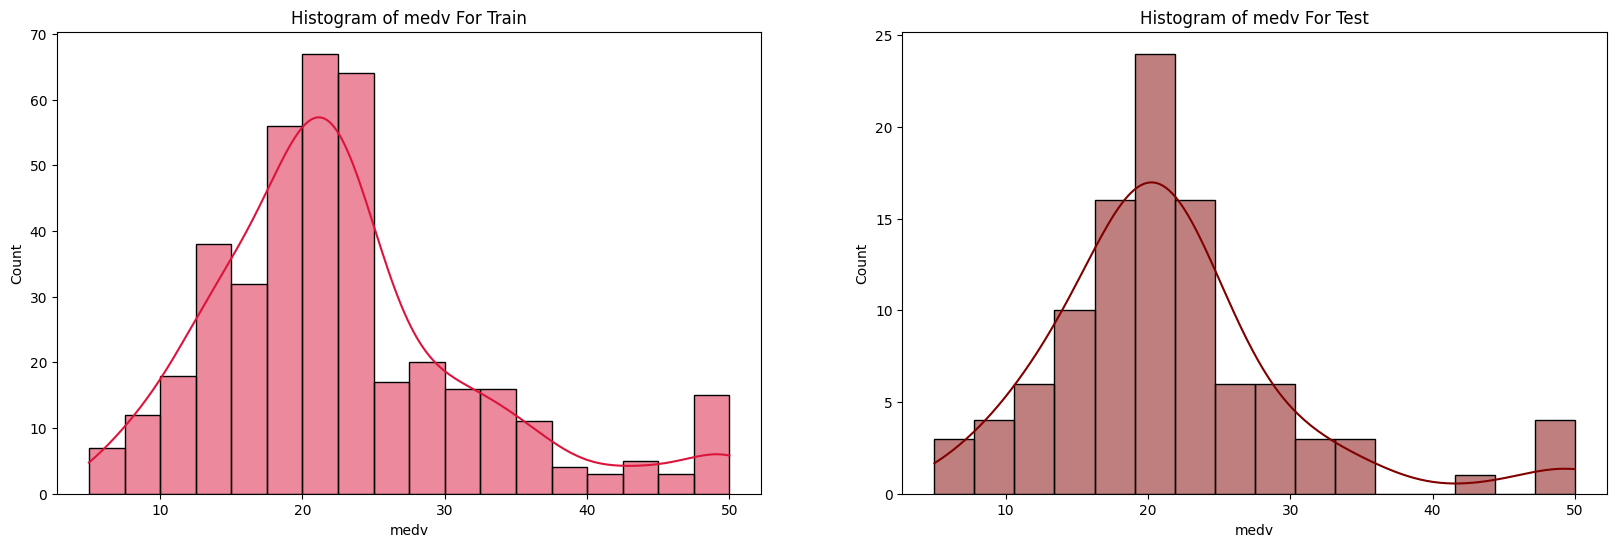

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(target_df_train['medv'], kde=True, ax=axes[0],color='crimson')
axes[0].set_title(f'Histogram of medv For Train')

sns.histplot(target_df_test['medv'],kde=True ,ax=axes[1], color='maroon')
axes[1].set_title(f'Histogram of medv For Test')


plt.show()

In [13]:
feature_df_train.shape[0], feature_df_test.shape[0]

(404, 102)

#Analisis Distribusi Data
* CRIM: Sangat right-skewed, menunjukkan mayoritas wilayah memiliki tingkat kriminalitas rendah, namun terdapat beberapa wilayah dengan kriminalitas tinggi yang berkorelasi negatif terhadap harga rumah.

* ZN: Didominasi nilai nol dan right-skewed, di mana nilai ZN tinggi merepresentasikan area hunian eksklusif yang berkorelasi positif dengan harga rumah.

* INDUS: Distribusi tidak simetris, menunjukkan variasi proporsi area industri yang tinggi dapat menurunkan kualitas lingkungan dan berkorelasi negatif dengan harga rumah.

* CHAS: Variabel dummy (0/1), menunjukkan kedekatan dengan Sungai Charles yang umumnya berkorelasi positif terhadap harga rumah.

* NOX: Sedikit right-skewed, mencerminkan variasi tingkat polusi udara, di mana konsentrasi NOx yang tinggi berkorelasi negatif dengan harga rumah.

* RM: Distribusi mendekati normal, menunjukkan bahwa semakin banyak jumlah kamar maka ukuran rumah semakin besar dan harga rumah cenderung meningkat (korelasi positif).

* AGE: Left-skewed dengan banyak nilai tinggi, mengindikasikan wilayah dengan bangunan tua yang berkorelasi negatif terhadap harga rumah.

* DIS: Right-skewed, menggambarkan jarak ke pusat pekerjaan, di mana jarak yang lebih jauh umumnya lebih nyaman dan berkorelasi positif dengan harga rumah.

* RAD: Distribusi diskrit dengan nilai tinggi, mencerminkan kedekatan terhadap jalan raya besar dan kawasan industri yang cenderung menurunkan kenyamanan sehingga berkorelasi negatif dengan harga rumah.

* TAX: Distribusi multimodal, menunjukkan variasi pajak properti antar wilayah, di mana pajak yang lebih tinggi berkorelasi negatif terhadap harga rumah.

* PTRATIO: Distribusi relatif stabil, menunjukkan rasio murid-guru yang tinggi menandakan kualitas pendidikan yang lebih rendah dan berkorelasi negatif dengan harga rumah.

* BLACK: Distribusi ekstrem akibat transformasi non-linear indikator demografis, di mana nilai yang lebih tinggi mencerminkan kondisi sosial-ekonomi yang lebih baik dan berkorelasi positif dengan harga rumah.

* LSTAT: Sangat right-skewed, menunjukkan persentase penduduk berstatus sosial ekonomi rendah yang tinggi dan berkorelasi negatif dengan harga rumah.

* MEDV: Distribusi mendekati normal dengan sedikit nilai ekstrem, merupakan variabel target yang merepresentasikan harga median rumah.
#Namun karena total data hanya sebanyak 506 (404 Train, 102 Test), Outlier pada dataset tidak dihapus. Selain itu nilai ekstrem yang muncul masih merepresentasikan kondisi nyata lingkungan perumahan di Boston, seperti wilayah dengan tingkat kriminalitas tinggi, pajak properti besar, atau rumah dengan ukuran dan harga yang sangat tinggi. Selain itu, outlier muncul secara konsisten pada data training dan testing sehingga bukan merupakan kesalahan pencatatan data. Penghapusan outlier berpotensi menghilangkan informasi penting dan menyebabkan bias pada model. Model regresi yang digunakan, yaitu Ridge dan Lasso, juga relatif robust terhadap nilai ekstrem karena adanya mekanisme regularisasi.

#3. Analisis Korelasi dan Seleksi Fitur

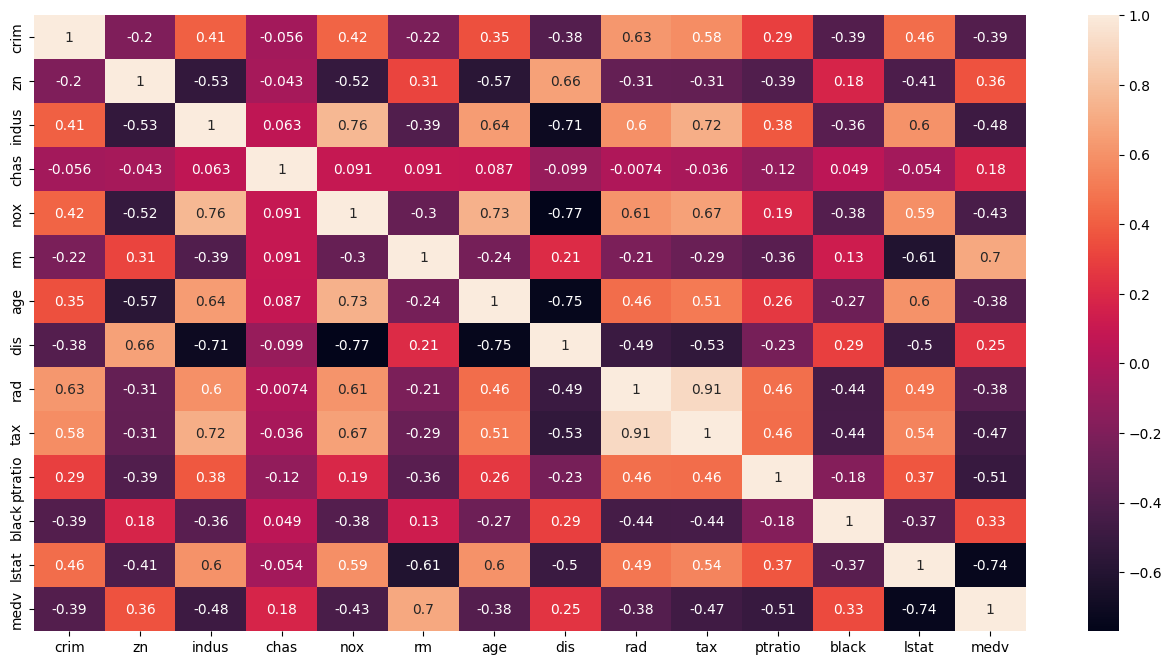

In [14]:
plt.subplots(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
# Cek Multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature)

# List comprehension
vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index=X.columns).reset_index()

vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496
10,tax,9.008554


* dari heatmap dan vif score menunjukkan bahwa tax sangat berkorelasi dengan rad, namun nilainya masih dibawah 10 sehingga masaih dalama ambang batas yang dapat diterima

#4. Pelatihan Model

Ridge

In [23]:
from sklearn.linear_model import Ridge

X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

In [24]:
# alpha = lambda (lambda yg ada di rumus ridge dan lasso)
ridge_reg = Ridge() # statik parameter model default memilih alpha = 1
ridge_reg.fit(X_df_train, y_df_train) # training

Ridge()

In [25]:
feature_df_train.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [27]:
data = feature_df_train
model_ridge = ridge_reg

# mencari koefisien regresi
coef_df = pd.DataFrame(
    {
        'feature':['intercept'] + data.columns.tolist(),
        'coef':[model_ridge.intercept_] + model_ridge.coef_.tolist()
    }
)

coef_df

,feature,coef
0,intercept,25.104099
1,crim,-0.109234
2,zn,0.032271
3,indus,0.007498
4,chas,2.545470
5,nox,-9.537952
6,rm,4.464505
7,age,-0.012191
8,dis,-1.338700
9,rad,0.248882


Lasso

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg.fit(X_df_train, y_df_train)

Lasso(alpha=0.1, random_state=42)

In [29]:
data = feature_df_train
model = lasso_reg

# mencari koefisien regresi
coef_df = pd.DataFrame(
    {
        'feature':['intercept'] + data.columns.tolist(),
        'coefficient':[model.intercept_] + list(model.coef_)
    }
)

coef_df

,feature,coefficient
0,intercept,19.859769
1,crim,-0.104157
2,zn,0.034893
3,indus,-0.016785
4,chas,0.919952
5,nox,-0.000000
6,rm,4.311687
7,age,-0.015126
8,dis,-1.151487
9,rad,0.239237


#Ridge vs Lasso Regression
* Stabilitas vs Seleksi Fitur:
Ridge mempertahankan seluruh fitur dengan mengecilkan koefisien sehingga model lebih stabil, sedangkan Lasso melakukan seleksi fitur dengan menghilangkan variabel yang dianggap tidak signifikan (misalnya nox).

* Penanganan Multicollinearity:
Ridge lebih efektif dalam menangani multicollinearity dengan mendistribusikan pengaruh antar fitur yang berkorelasi, sementara Lasso cenderung memilih satu fitur dan menghilangkan fitur lain yang redundan.

* Fitur Dominan Konsisten:
Kedua model menunjukkan bahwa rm (jumlah kamar) berpengaruh positif kuat dan lstat (persentase penduduk berstatus rendah) berpengaruh negatif kuat terhadap harga rumah, menandakan konsistensi hasil dengan teori ekonomi properti.

* Implikasi Pemilihan Model:
Ridge lebih cocok untuk tujuan prediksi dengan mempertahankan informasi lengkap, sedangkan Lasso lebih sesuai untuk analisis interpretatif dan penyederhanaan model.


#6. Evaluasi Model


In [45]:
# split train test
# lambda = alpha
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)
# ratio 6:2:2
# 6 training
# 2 testing
# 2 validation

# Bentukan lain
# feature_train, target_train, feature_test, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)
# X_test, y_test, X_val, y_val = train_test_split(feature_test, target_test, test_size = 0.5, random_state = 42)
# train : test : val = 80 : 10 : 10

In [51]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

In [59]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ridge & Lasso dengan alpha terbaik (contoh)
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.01)

# FIT MODEL
ridge.fit(X_df_train, y_df_train)
lasso.fit(X_df_train, y_df_train)

# PREDIKSI
y_pred_ridge = ridge.predict(X_df_validation)
y_pred_lasso = lasso.predict(X_df_validation)


In [60]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape


In [61]:
ridge_mae, ridge_rmse, ridge_mape = evaluate_model(y_df_validation, y_pred_ridge)
lasso_mae, lasso_rmse, lasso_mape = evaluate_model(y_df_validation, y_pred_lasso)

print("RIDGE")
print("MAE :", ridge_mae)
print("RMSE:", ridge_rmse)
print("MAPE:", ridge_mape)

print("\nLASSO")
print("MAE :", lasso_mae)
print("RMSE:", lasso_rmse)
print("MAPE:", lasso_mape)


RIDGE
MAE : 3.0431964558331197
RMSE: 4.671884227425295
MAPE: 15.292472669804729

LASSO
MAE : 3.084204426621941
RMSE: 4.673807365701366
MAPE: 15.467264458997013


In [62]:
import pandas as pd

evaluation_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'MAE': [ridge_mae, lasso_mae],
    'RMSE': [ridge_rmse, lasso_rmse],
    'MAPE (%)': [ridge_mape, lasso_mape]
})

evaluation_df


,Model,MAE,RMSE,MAPE (%)
0,Ridge,3.043196,4.671884,15.292473
1,Lasso,3.084204,4.673807,15.467264


# Hasil Evaluasi
* Performa Prediksi: Ridge menghasilkan MAE (3.04) dan RMSE (4.67) yang sedikit lebih rendah dibandingkan Lasso, menunjukkan Ridge lebih akurat dalam memprediksi harga rumah secara keseluruhan.

* Stabilitas Error: Nilai RMSE kedua model hampir sama, menandakan tidak ada perbedaan ekstrem dalam penalti error besar. Ridge tetap unggul meskipun selisihnya kecil.

* MAPE (Error Relatif): Ridge memiliki MAPE 15.29%, lebih rendah dibandingkan Lasso 15.47%. Artinya, secara rata-rata, prediksi Ridge lebih dekat ke nilai aktual secara persentase.

# Kesimpulan Model
Ridge Regression lebih optimal untuk tujuan prediksi karena memberikan error yang lebih kecil. Lasso Regression tetap relevan karena model lebih sederhana (feature selection), meskipun akurasinya sedikit di bawah Ridge.